# =======================
# Part 1: Merge data from CSVs
# =======================

We have two files:
- `customer_details.csv` with one row per customer, details about age and subscription, and the churn yes/no label
- `churn_details_per_customer.csv` with one row per customer, but more details about why they churned, which is interesting for us

We need to merge them in the same Dataframe to use it properly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

print("✓ NumPy version:", np.__version__)
print("✓ Pandas version:", pd.__version__)
print("✓ Scikit-Learn version:", sklearn.__version__)

✓ NumPy version: 2.3.4
✓ Pandas version: 2.3.3
✓ Scikit-Learn version: 1.7.2


In [2]:
customer_dataframe = pd.read_csv('./data/customer_details.csv')
churn_details_dataframe = pd.read_csv('./data/churn_details_per_customer.csv')

customer_dataframe.head(10)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,303784,6388-TABGU,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
churn_details_dataframe.head(10)

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
5,YZFIXL5823,4412-YLTKF,1,Q3,1,Churned,Yes,1,95,4638,Competitor,Competitor had better devices
6,KSGHEG1626,0390-DCFDQ,1,Q3,2,Churned,Yes,1,76,3964,Other,Don't know
7,PABMTY8825,3445-HXXGF,1,Q3,1,Churned,Yes,1,91,5444,Dissatisfaction,Service dissatisfaction
8,YAMNBI7178,2656-FMOKZ,1,Q3,2,Churned,Yes,1,91,5717,Dissatisfaction,Limited range of services
9,GIFMGB8144,2070-FNEXE,1,Q3,2,Churned,Yes,1,81,4419,Price,Lack of affordable download/upload speed


Merge the two datasets and see if the number of rows are the same, and if the churn label doesn't changed

In [4]:
# first used Dataframe.join but it didn't merged by key like in the documentation. 
# pd.merge work perfectly
merged_dataframe = pd.merge(customer_dataframe, churn_details_dataframe, on='Customer ID' , how='inner')

print(customer_dataframe.describe())
print(customer_dataframe.head(10))
print(churn_details_dataframe.describe())
print(churn_details_dataframe.head(10))

print(merged_dataframe.describe())
merged_dataframe.head(10)

           LoyaltyID       Tenure  Monthly Charges
count    7043.000000  7043.000000      7043.000000
mean   550382.651001    32.371149        64.761692
std    260776.118690    24.559481        30.090047
min    100346.000000     0.000000        18.250000
25%    323604.500000     9.000000        35.500000
50%    548704.000000    29.000000        70.350000
75%    776869.000000    55.000000        89.850000
max    999912.000000    72.000000       118.750000
   LoyaltyID Customer ID Senior Citizen Partner Dependents  Tenure  \
0     318537  7590-VHVEG             No     Yes         No       1   
1     152148  5575-GNVDE             No      No         No      34   
2     326527  3668-QPYBK             No      No         No       2   
3     845894  7795-CFOCW             No      No         No      45   
4     503388  9237-HQITU             No      No         No       2   
5     160192  9305-CDSKC             No      No         No       8   
6     680623  1452-KIOVK             No      No    

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,1,Q3,3,Joined,No,0,27,3964,NaN,NaN
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,1,Q3,3,Stayed,No,0,61,3441,NaN,NaN
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,1,Q3,3,Stayed,No,0,66,4307,NaN,NaN
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved
5,160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,...,1,Q3,3,Churned,Yes,1,86,5372,Other,Moved
6,680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,1,Q3,4,Stayed,No,0,43,4459,NaN,NaN
7,340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,...,1,Q3,3,Stayed,No,0,51,2013,NaN,NaN
8,582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,1,Q3,3,Churned,Yes,1,84,5003,Other,Moved
9,303784,6388-TABGU,No,No,Yes,62,Yes,No,DSL,Yes,...,1,Q3,4,Stayed,No,0,58,4529,NaN,NaN


# =======================
# Part 2: Data cleaning
# =======================

## Remove the columns that doesn't fit to the initial need

The initial dataset is about telecom customers and some data are referred to their phone and internet consumption, services subscribed and so on.

As in our context we are in a consultant-client B2B AI context, **we don't need data that only refers to phone and internet services**.

Those kind of data will never be entered by the consultants so they will not be relevant for our agent.

We will see further if some columns are problematic for the agent itself then.

In [5]:
pd.set_option('display.max_columns', None)
print(merged_dataframe["Quarter"].unique())
print(merged_dataframe["Status ID"].count())
merged_dataframe.head(10)

['Q3']
7043


,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Status ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,GODTMI5747,1,Q3,3,Joined,No,0,27,3964,NaN,NaN
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,JXJTVI9837,1,Q3,3,Stayed,No,0,61,3441,NaN,NaN
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,SUDNGT6444,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,RJWCXJ6879,1,Q3,3,Stayed,No,0,66,4307,NaN,NaN
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,KZSZDV8891,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved
5,160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,EPTIUU1269,1,Q3,3,Churned,Yes,1,86,5372,Other,Moved
6,680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,VNESFB2527,1,Q3,4,Stayed,No,0,43,4459,NaN,NaN
7,340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,OMMXZO3399,1,Q3,3,Stayed,No,0,51,2013,NaN,NaN
8,582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,PAJIVH8196,1,Q3,3,Churned,Yes,1,84,5003,Other,Moved
9,303784,6388-TABGU,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,VUPSJJ9678,1,Q3,4,Stayed,No,0,58,4529,NaN,NaN


In [6]:
merged_dataframe.drop(
    columns=[
            "Partner", # If the customer have a partner or not
            "Dependents", # If family members lives with the customer
            "Phone Service",
            "Multiple Lines", # multiple phone lines
            "Internet Service",
            "Online Security", # Online Security extra subscription
            "Online Backup", # Online Backup extra subscription
            "Device Protection", # Device Protection extra subscription
            "Tech Support", # Tech support extra subscription
            "Streaming TV", # If customer watch streaming TV
            "Streaming Movies", # If customer watch streaming Movies
            "Paperless Billing" # If customer chose the paperless billing option
        ],
        inplace=True
    )

merged_dataframe.head(10)

,LoyaltyID,Customer ID,Senior Citizen,Tenure,Contract,Payment Method,Monthly Charges,Total Charges,Churn,Status ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,318537,7590-VHVEG,No,1,Month-to-month,Electronic check,29.85,29.85,No,GODTMI5747,1,Q3,3,Joined,No,0,27,3964,NaN,NaN
1,152148,5575-GNVDE,No,34,One year,Mailed check,56.95,1889.5,No,JXJTVI9837,1,Q3,3,Stayed,No,0,61,3441,NaN,NaN
2,326527,3668-QPYBK,No,2,Month-to-month,Mailed check,53.85,108.15,Yes,SUDNGT6444,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer
3,845894,7795-CFOCW,No,45,One year,Bank transfer (automatic),42.30,1840.75,No,RJWCXJ6879,1,Q3,3,Stayed,No,0,66,4307,NaN,NaN
4,503388,9237-HQITU,No,2,Month-to-month,Electronic check,70.70,151.65,Yes,KZSZDV8891,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved
5,160192,9305-CDSKC,No,8,Month-to-month,Electronic check,99.65,820.5,Yes,EPTIUU1269,1,Q3,3,Churned,Yes,1,86,5372,Other,Moved
6,680623,1452-KIOVK,No,22,Month-to-month,Credit card (automatic),89.10,1949.4,No,VNESFB2527,1,Q3,4,Stayed,No,0,43,4459,NaN,NaN
7,340874,6713-OKOMC,No,10,Month-to-month,Mailed check,29.75,301.9,No,OMMXZO3399,1,Q3,3,Stayed,No,0,51,2013,NaN,NaN
8,582674,7892-POOKP,No,28,Month-to-month,Electronic check,104.80,3046.05,Yes,PAJIVH8196,1,Q3,3,Churned,Yes,1,84,5003,Other,Moved
9,303784,6388-TABGU,No,62,One year,Bank transfer (automatic),56.15,3487.95,No,VUPSJJ9678,1,Q3,4,Stayed,No,0,58,4529,NaN,NaN


We can now see some random identifiers and strings used to describe numerical data (like `Churn Label` telling that 1 = Yes and 0 = No for `Churn Value`).

For an AI agent, it is duplicate and irrelevent, let's remove it.

We only need to know a unique id for the customer and one churn label in a numerical shape.

In [7]:
merged_dataframe.drop(
    columns=[
            "Churn Label", # Duplicate of "Churn Value"
            "Churn", # Duplicate of "Churn Value"
            "Count", # Always equal to 1
            "LoyaltyID", # Duplicate for "Customer ID_Customer"
            "Status ID", # Duplicate for "Customer ID_Customer"
            "Quarter", # Always equal to "Q3"            
        ],
        inplace=True
    )

merged_dataframe.head(10)

,Customer ID,Senior Citizen,Tenure,Contract,Payment Method,Monthly Charges,Total Charges,Satisfaction Score,Customer Status,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,7590-VHVEG,No,1,Month-to-month,Electronic check,29.85,29.85,3,Joined,0,27,3964,NaN,NaN
1,5575-GNVDE,No,34,One year,Mailed check,56.95,1889.5,3,Stayed,0,61,3441,NaN,NaN
2,3668-QPYBK,No,2,Month-to-month,Mailed check,53.85,108.15,1,Churned,1,86,3239,Competitor,Competitor made better offer
3,7795-CFOCW,No,45,One year,Bank transfer (automatic),42.30,1840.75,3,Stayed,0,66,4307,NaN,NaN
4,9237-HQITU,No,2,Month-to-month,Electronic check,70.70,151.65,2,Churned,1,67,2701,Other,Moved
5,9305-CDSKC,No,8,Month-to-month,Electronic check,99.65,820.5,3,Churned,1,86,5372,Other,Moved
6,1452-KIOVK,No,22,Month-to-month,Credit card (automatic),89.10,1949.4,4,Stayed,0,43,4459,NaN,NaN
7,6713-OKOMC,No,10,Month-to-month,Mailed check,29.75,301.9,3,Stayed,0,51,2013,NaN,NaN
8,7892-POOKP,No,28,Month-to-month,Electronic check,104.80,3046.05,3,Churned,1,84,5003,Other,Moved
9,6388-TABGU,No,62,One year,Bank transfer (automatic),56.15,3487.95,4,Stayed,0,58,4529,NaN,NaN


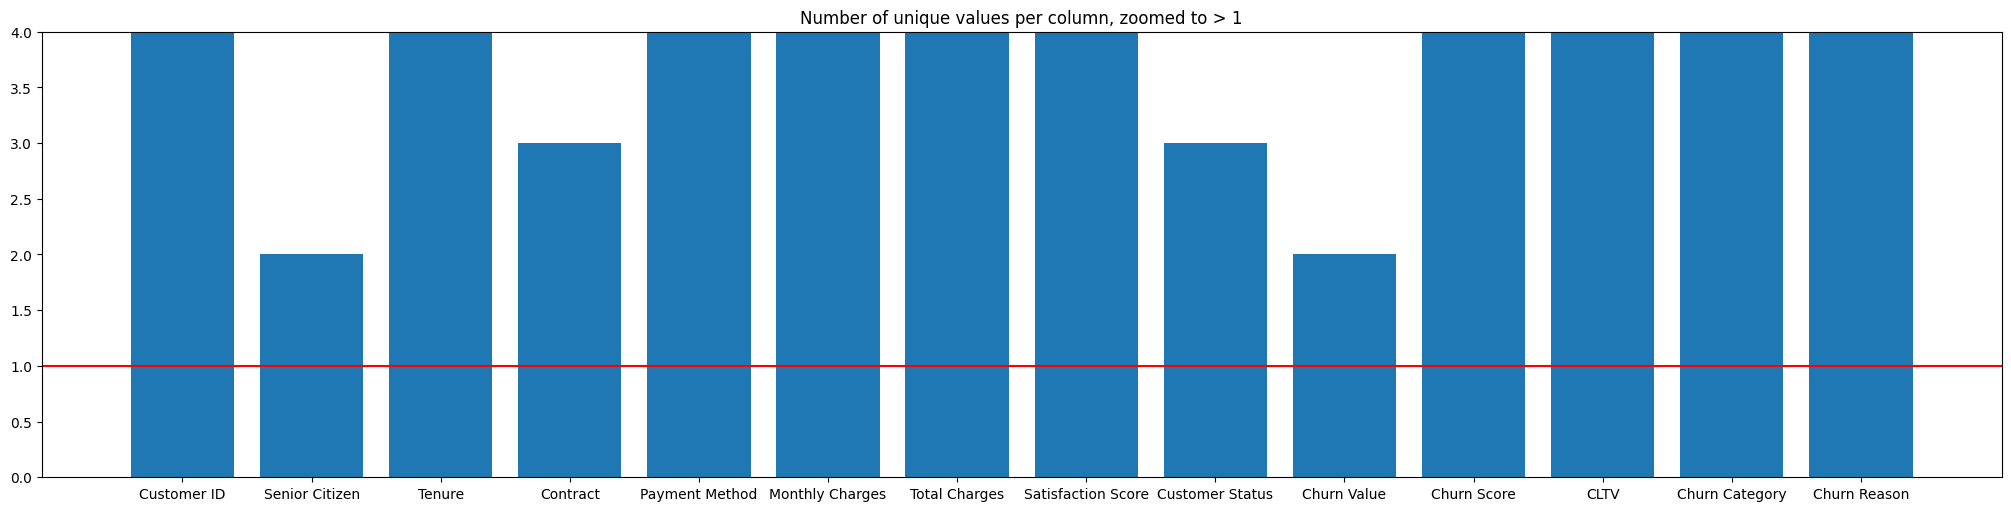

Customer ID           7043
Senior Citizen           2
Tenure                  73
Contract                 3
Payment Method           4
Monthly Charges       1585
Total Charges         6531
Satisfaction Score       5
Customer Status          3
Churn Value              2
Churn Score             81
CLTV                  3438
Churn Category           5
Churn Reason            20
dtype: int64


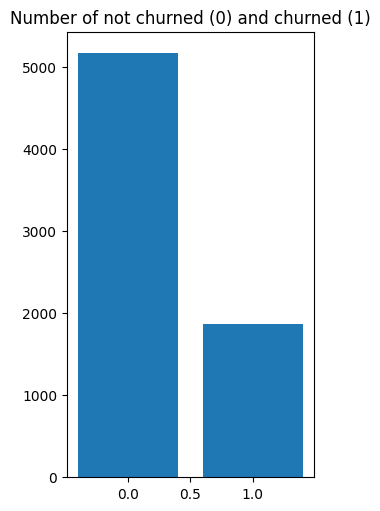

Churn Value
0    5174
1    1869
Name: count, dtype: int64
in percents:
Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64


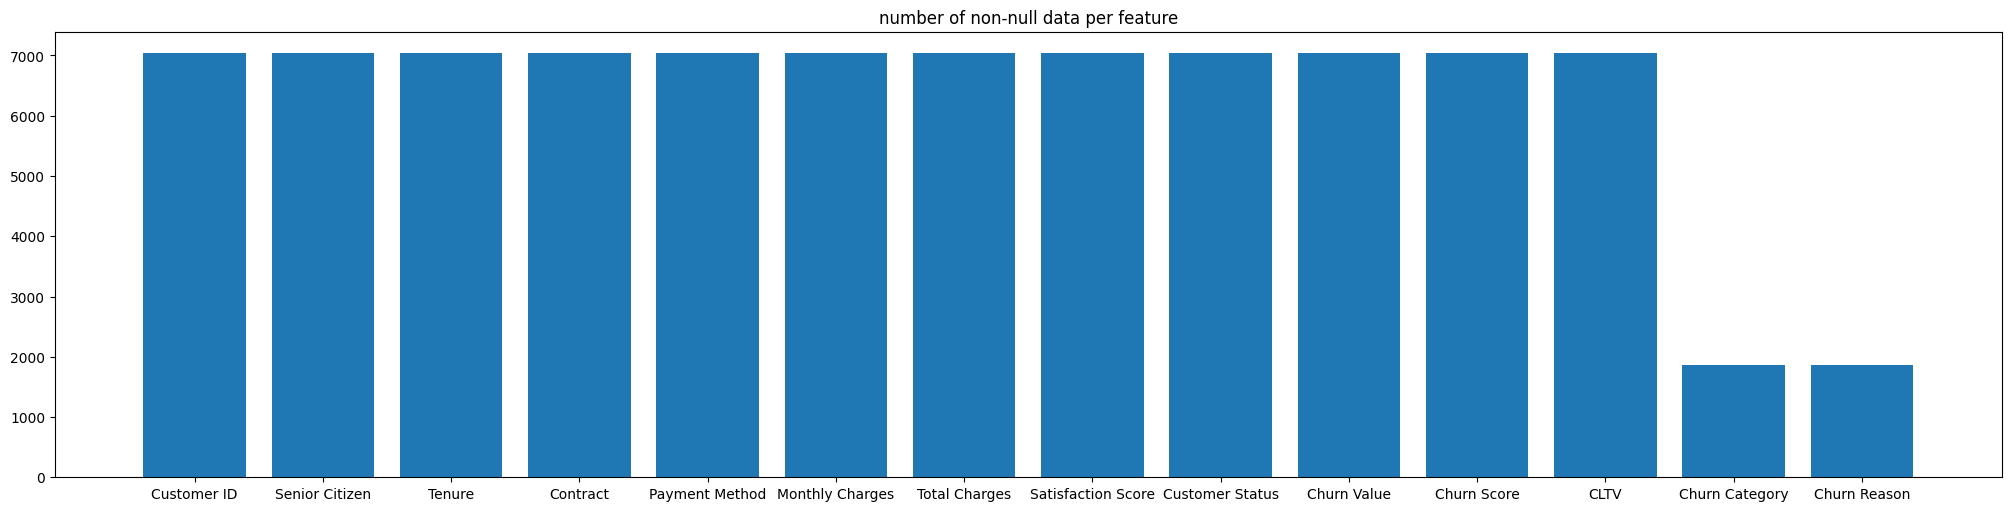

Customer ID           7043
Senior Citizen        7043
Tenure                7043
Contract              7043
Payment Method        7043
Monthly Charges       7043
Total Charges         7043
Satisfaction Score    7043
Customer Status       7043
Churn Value           7043
Churn Score           7043
CLTV                  7043
Churn Category        1869
Churn Reason          1869
dtype: int64
7043


In [8]:
count_all_unique_values = merged_dataframe.nunique()
fig, ax = plt.subplots(figsize=(20, 5), layout='constrained')
ax.set_title('Number of unique values per column, zoomed to > 1')
ax.axhline(1, color='red')
categories = count_all_unique_values.index
ax.bar(categories, count_all_unique_values.values)
plt.ylim(0,4)
plt.show()
print(merged_dataframe.nunique())
print("=================")

churn_value_counts = merged_dataframe["Churn Value"].value_counts()
fig2, ax2 = plt.subplots(figsize=(3, 5), layout='constrained')
ax2.set_title('Number of not churned (0) and churned (1)')
categories = churn_value_counts.index
ax2.bar(categories, churn_value_counts.values)
plt.show()
print(churn_value_counts)
print("in percents:")
print(merged_dataframe["Churn Value"].value_counts(normalize=True))
print("=================")

fig3, ax3 = plt.subplots(figsize=(20, 5), layout='constrained')
ax3.set_title('number of non-null data per feature')
categories = merged_dataframe.columns
ax3.bar(categories, merged_dataframe.count())
plt.show()
print(merged_dataframe.count())
print("=================")

print(merged_dataframe["Total Charges"].count())

Interesting data:

`Customer Status` is just like Churn Yes/No but with "Stayed" as another "Yes" -> Can be an idea for another AI Agent

`Customer ID` are all unique like we that their `Count` are always equal to 1. It will not be useful for our Agent now we know that one row = one customer

`Churn Category` and `Churn Reason` are 100% linked to churned customers, as they give details when `Churn Value` = 1. Which gives a cheat code we don't want to our future Agent.

`Churn Score` is *kinda* connected to Churn Value -> To monitor later

In [9]:
merged_dataframe.drop(
    columns=[
            "Customer Status",
            "Customer ID",
            "Churn Category",
            "Churn Reason"
        ],
        inplace=True
    )

merged_dataframe.head(10)

,Senior Citizen,Tenure,Contract,Payment Method,Monthly Charges,Total Charges,Satisfaction Score,Churn Value,Churn Score,CLTV
0,No,1,Month-to-month,Electronic check,29.85,29.85,3,0,27,3964
1,No,34,One year,Mailed check,56.95,1889.5,3,0,61,3441
2,No,2,Month-to-month,Mailed check,53.85,108.15,1,1,86,3239
3,No,45,One year,Bank transfer (automatic),42.30,1840.75,3,0,66,4307
4,No,2,Month-to-month,Electronic check,70.70,151.65,2,1,67,2701
5,No,8,Month-to-month,Electronic check,99.65,820.5,3,1,86,5372
6,No,22,Month-to-month,Credit card (automatic),89.10,1949.4,4,0,43,4459
7,No,10,Month-to-month,Mailed check,29.75,301.9,3,0,51,2013
8,No,28,Month-to-month,Electronic check,104.80,3046.05,3,1,84,5003
9,No,62,One year,Bank transfer (automatic),56.15,3487.95,4,0,58,4529


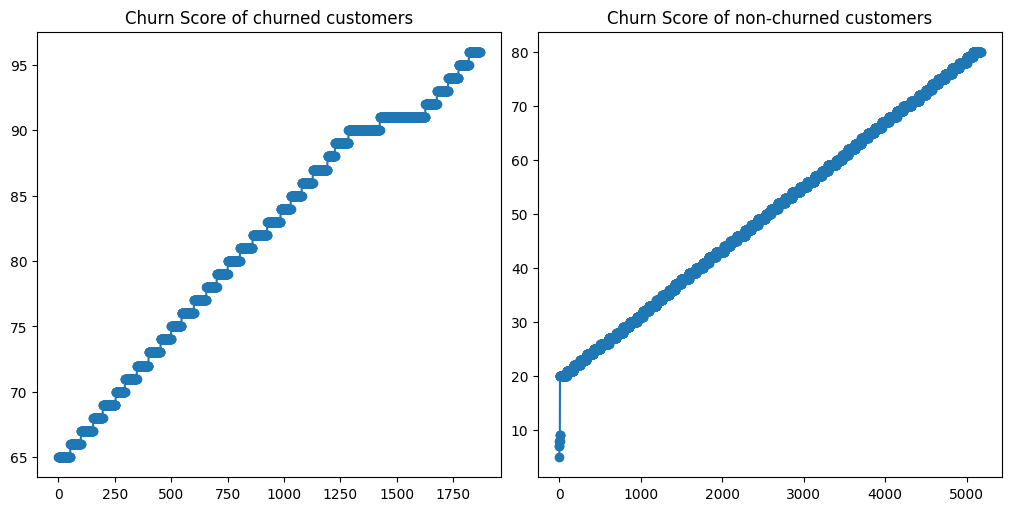

In [10]:
score_dataframe = merged_dataframe.copy()
score_churn = score_dataframe[score_dataframe['Churn Value'] == 1]
score_not_churn = score_dataframe[score_dataframe['Churn Value'] == 0]
score_churn = score_churn['Churn Score'].sort_values(ignore_index=True)
score_not_churn = score_not_churn['Churn Score'].sort_values(ignore_index=True)

fig_score, ax_score = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
ax_score[0].set_title('Churn Score of churned customers')
score_churned_x = score_churn.index
score_churned_y = score_churn.values
ax_score[0].plot(score_churned_x, score_churned_y, 'o-')
ax_score[1].set_title('Churn Score of non-churned customers')
score_not_churned_x = score_not_churn.index
score_not_churned_y = score_not_churn.values
ax_score[1].plot(score_not_churned_x, score_not_churned_y, 'o-')
plt.show()

The churn Yes/No are not equal in proportions (73% of Yes versus 27% of No), which can be good if we want to predict only a stayed person, but we want to predict if a client have churned or not.

Let's see how we can balance it.

In [11]:
#Change Senior Citizen from Yes/no to 1/0
print(merged_dataframe["Satisfaction Score"].value_counts())
print('=============================')
print(merged_dataframe["Senior Citizen"].value_counts())
print('=============================')

merged_dataframe['Senior Citizen'] = merged_dataframe['Senior Citizen'].apply(lambda x: 1 if x == 'Yes' else 0)

print(merged_dataframe['Senior Citizen'].value_counts())
print('=============================')

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64
Senior Citizen
0    5901
1    1142
Name: count, dtype: int64


In [12]:
#Change Total Charges from objects to floats
print(merged_dataframe["Total Charges"].dtypes)
print(merged_dataframe["Total Charges"].count())
print('==============')
merged_with_nulls = merged_dataframe.copy()
merged_with_nulls['Total Charges'] = pd.to_numeric(merged_dataframe['Total Charges'], errors='coerce')
print(merged_with_nulls['Total Charges'].dtypes)
print(merged_dataframe["Total Charges"].count())
print('==============')

object
7043
float64
7043


In [13]:
# Some of the total charges are empty, the Tenure (number of months since the customer subscribed) are also equal to 0, and the contracts are all One Year and Two Year
# One year and Two year contracts exists with less than One or Two years of existence, yet the Total Charges are still calculated following the Tenure
# That means that the 0 month customers are just there for less than one-month, and their Total Charges should be equal to 0

print(merged_with_nulls['Total Charges'].count())
print('==============')
print(merged_with_nulls['Total Charges'].isnull().sum())
print('==============')
null_charges = merged_with_nulls[merged_with_nulls["Total Charges"].isnull()]
print(null_charges.head(20))
print('=============================')
year_contracts = merged_with_nulls[(merged_with_nulls["Contract"] == "One year") & (merged_with_nulls["Tenure"] == 1)]
print(year_contracts.head())
year_contracts = merged_with_nulls[(merged_with_nulls["Contract"] == "Two year") & (merged_with_nulls["Tenure"] == 1)]
print(year_contracts.head())
print('=============================')

merged_with_nulls['Total Charges'].replace(np.nan, 0, inplace=True)
print(merged_with_nulls.count())
print('==============')
zero_total = merged_with_nulls[merged_with_nulls["Total Charges"] == 0]
print(zero_total.head(20))

7032
11
      Senior Citizen  Tenure  Contract             Payment Method  \
488                0       0  Two year  Bank transfer (automatic)   
753                0       0  Two year               Mailed check   
936                0       0  Two year               Mailed check   
1082               0       0  Two year               Mailed check   
1340               0       0  Two year    Credit card (automatic)   
3331               0       0  Two year               Mailed check   
3826               0       0  Two year               Mailed check   
4380               0       0  Two year               Mailed check   
5218               0       0  One year               Mailed check   
6670               0       0  Two year               Mailed check   
6754               0       0  Two year  Bank transfer (automatic)   

      Monthly Charges  Total Charges  Satisfaction Score  Churn Value  \
488             52.55            NaN                   3            0   
753             2

C:\Users\nicol\AppData\Local\Temp\ipykernel_10312\1573733886.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_with_nulls['Total Charges'].replace(np.nan, 0, inplace=True)


,Senior Citizen,Tenure,Monthly Charges,Total Charges,Satisfaction Score,Churn Value,Churn Score,CLTV
Senior Citizen,1.000000,0.016567,0.220173,0.103006,-0.116601,0.150889,0.101947,-0.003167
Tenure,0.016567,1.000000,0.247900,0.826178,0.210056,-0.352229,-0.224523,0.396406
Monthly Charges,0.220173,0.247900,1.000000,0.651174,-0.223922,0.193356,0.132115,0.098693
Total Charges,0.103006,0.826178,0.651174,1.000000,0.068809,-0.198324,-0.123770,0.342091
Satisfaction Score,-0.116601,0.210056,-0.223922,0.068809,1.000000,-0.754649,-0.495144,0.075811
Churn Value,0.150889,-0.352229,0.193356,-0.198324,-0.754649,1.000000,0.660772,-0.127463
Churn Score,0.101947,-0.224523,0.132115,-0.123770,-0.495144,0.660772,1.000000,-0.079232
CLTV,-0.003167,0.396406,0.098693,0.342091,0.075811,-0.127463,-0.079232,1.000000


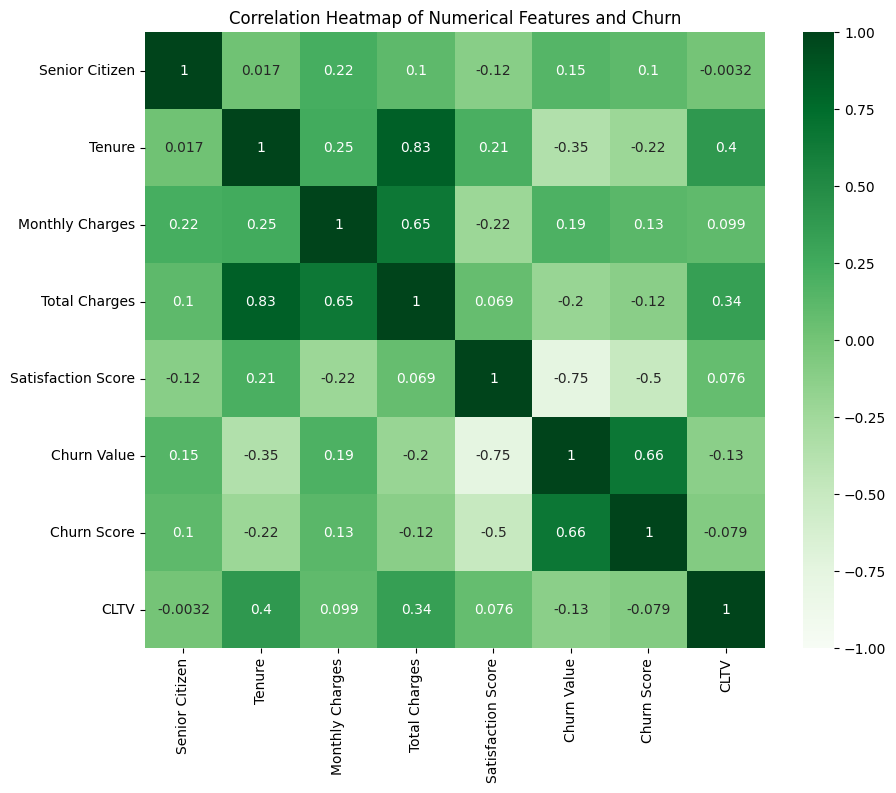

In [14]:
import seaborn as sns

#heatmap

numerical_dataframe = merged_with_nulls[['Senior Citizen', 'Tenure', 'Monthly Charges', 'Total Charges', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV']]
correlation_matrix = numerical_dataframe.corr()
display(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features and Churn')
plt.show()

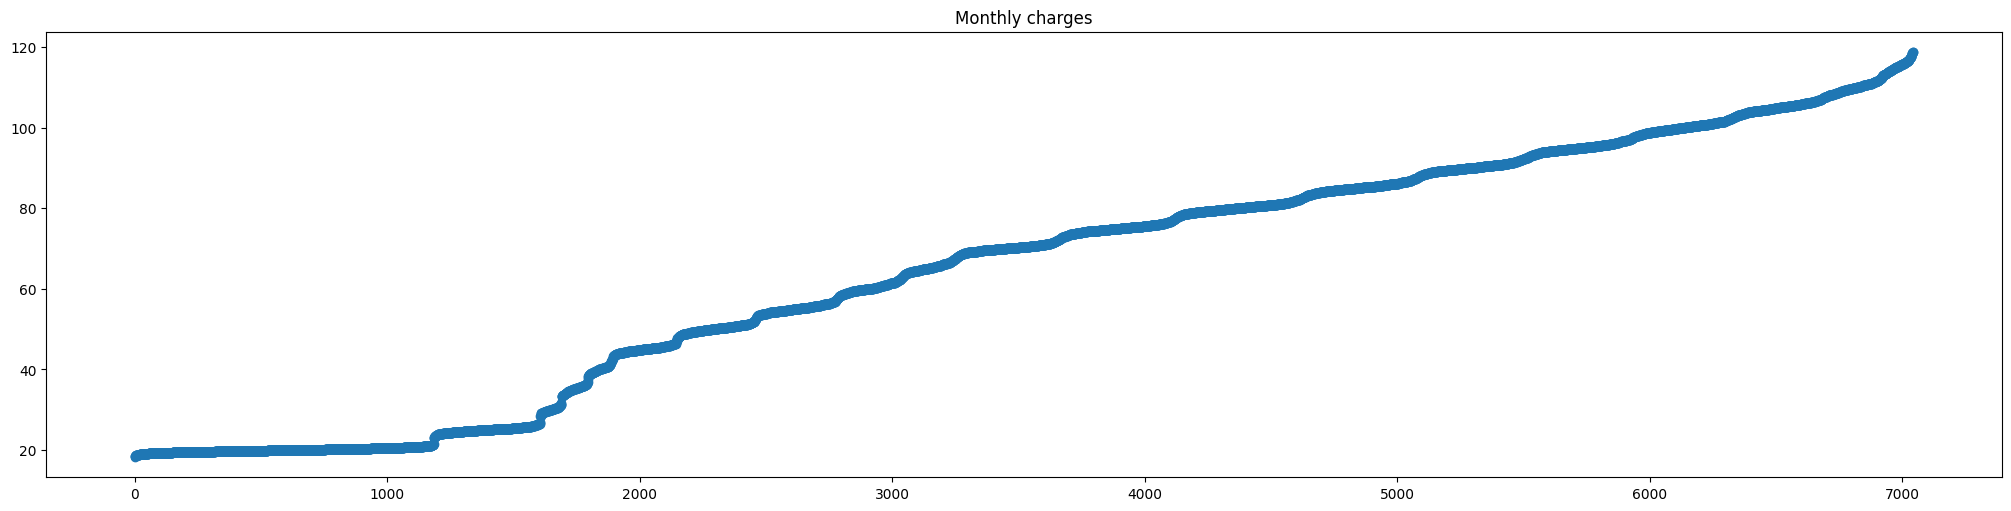

In [15]:
monthly_charges = merged_with_nulls['Monthly Charges'].sort_values(ignore_index=True)
fig4, ax4 = plt.subplots(figsize=(20, 5), layout='constrained')
ax4.set_title('Monthly charges')
monthly_x = monthly_charges.index
monthly_y = monthly_charges.values
ax4.plot(monthly_x, monthly_y, 'o-')
plt.show()

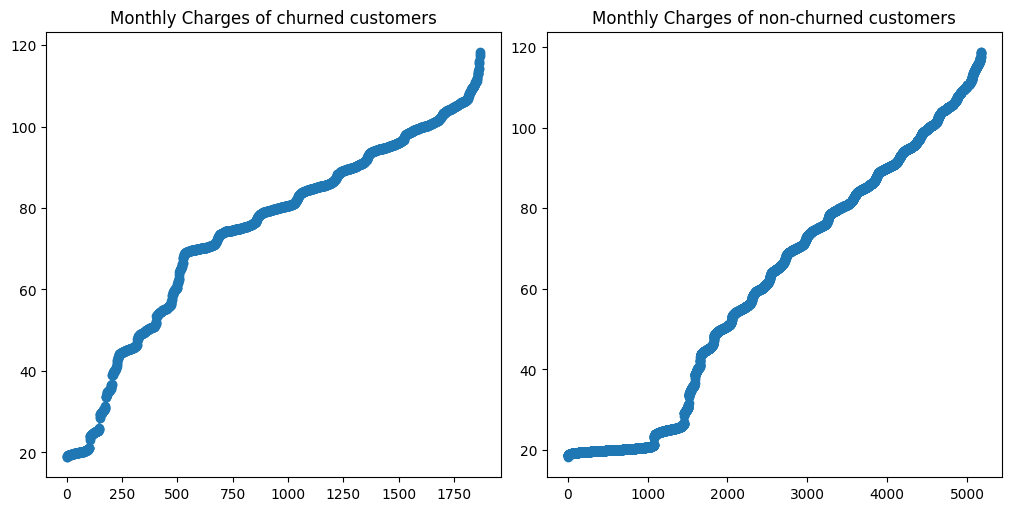

In [16]:
monthly_dataframe = merged_with_nulls.copy()
monthly_churn = monthly_dataframe[monthly_dataframe['Churn Value'] == 1]
monthly_not_churn = monthly_dataframe[monthly_dataframe['Churn Value'] == 0]
monthly_churn = monthly_churn['Monthly Charges'].sort_values(ignore_index=True)
monthly_not_churn = monthly_not_churn['Monthly Charges'].sort_values(ignore_index=True)

fig5, ax5 = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
ax5[0].set_title('Monthly Charges of churned customers')
monthly_churned_x = monthly_churn.index
monthly_churned_y = monthly_churn.values
ax5[0].plot(monthly_churned_x, monthly_churned_y, 'o-')
ax5[1].set_title('Monthly Charges of non-churned customers')
monthly_not_churned_x = monthly_not_churn.index
monthly_not_churned_y = monthly_not_churn.values
ax5[1].plot(monthly_not_churned_x, monthly_not_churned_y, 'o-')
plt.show()

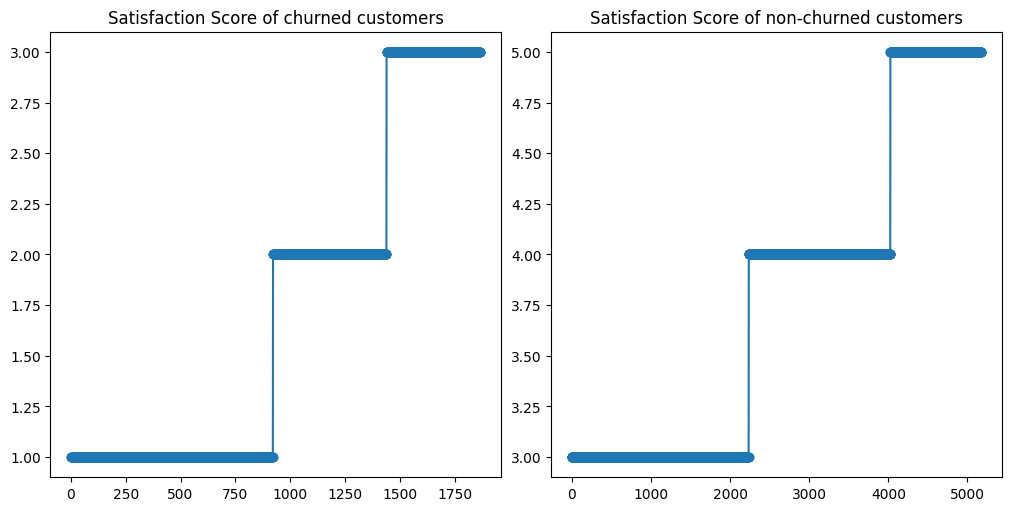

Satisfaction Score
1    922
2    518
3    429
Name: count, dtype: int64
Satisfaction Score
3    2236
4    1789
5    1149
Name: count, dtype: int64


In [17]:
satisfaction_dataframe = merged_with_nulls.copy()

# Clean dataframe split for churned and non-churned
satisfaction_churn_dataframe = satisfaction_dataframe[satisfaction_dataframe['Churn Value'] == 1]
satisfaction_not_churn_dataframe = satisfaction_dataframe[satisfaction_dataframe['Churn Value'] == 0]

# Used for visuals only
satisfaction_churn = satisfaction_churn_dataframe['Satisfaction Score'].sort_values(ignore_index=True)
satisfaction_not_churn = satisfaction_not_churn_dataframe['Satisfaction Score'].sort_values(ignore_index=True)

fig5, ax5 = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
ax5[0].set_title('Satisfaction Score of churned customers')
satisfaction_churn_x = satisfaction_churn.index
satisfaction_churn_y = satisfaction_churn.values
ax5[0].plot(satisfaction_churn_x, satisfaction_churn_y, 'o-')
ax5[1].set_title('Satisfaction Score of non-churned customers')
satisfaction_not_churned_x = satisfaction_not_churn.index
satisfaction_not_churned_y = satisfaction_not_churn.values
ax5[1].plot(satisfaction_not_churned_x, satisfaction_not_churned_y, 'o-')
plt.show()

print(satisfaction_churn.value_counts())
print(satisfaction_not_churn.value_counts())

In [18]:
from sklearn.utils import resample

satisfaction_not_churn_three = satisfaction_not_churn_dataframe[satisfaction_not_churn_dataframe['Satisfaction Score'] == 3]
satisfaction_not_churn_four = satisfaction_not_churn_dataframe[satisfaction_not_churn_dataframe['Satisfaction Score'] == 4]
satisfaction_not_churn_five = satisfaction_not_churn_dataframe[satisfaction_not_churn_dataframe['Satisfaction Score'] == 5]

satisfaction_not_churn_three = resample(satisfaction_not_churn_three, replace=False, n_samples=922, random_state=42)
satisfaction_not_churn_four = resample(satisfaction_not_churn_four, replace=False, n_samples=518, random_state=42)
satisfaction_not_churn_five = resample(satisfaction_not_churn_five, replace=False, n_samples=429, random_state=42)

balanced_satisfaction_not_churn = pd.concat([satisfaction_not_churn_three, satisfaction_not_churn_four, satisfaction_not_churn_five])

print(balanced_satisfaction_not_churn['Satisfaction Score'].value_counts())

Satisfaction Score
3    922
4    518
5    429
Name: count, dtype: int64


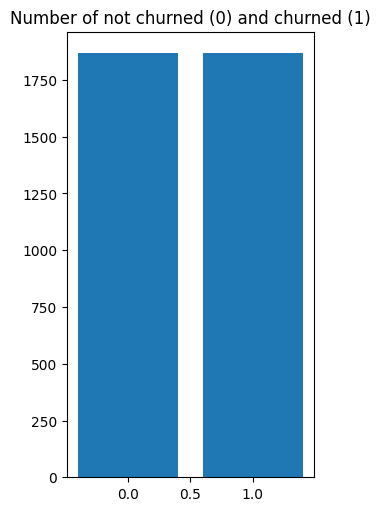

Churn Value
0    1869
1    1869
Name: count, dtype: int64
in percents:
Churn Value
0    0.5
1    0.5
Name: proportion, dtype: float64


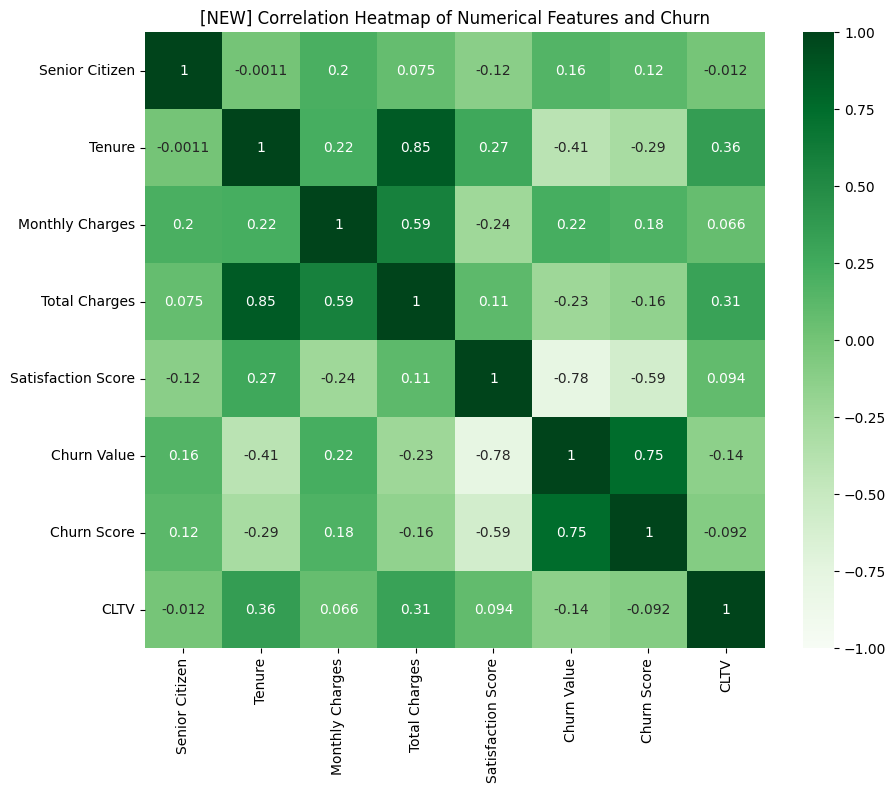

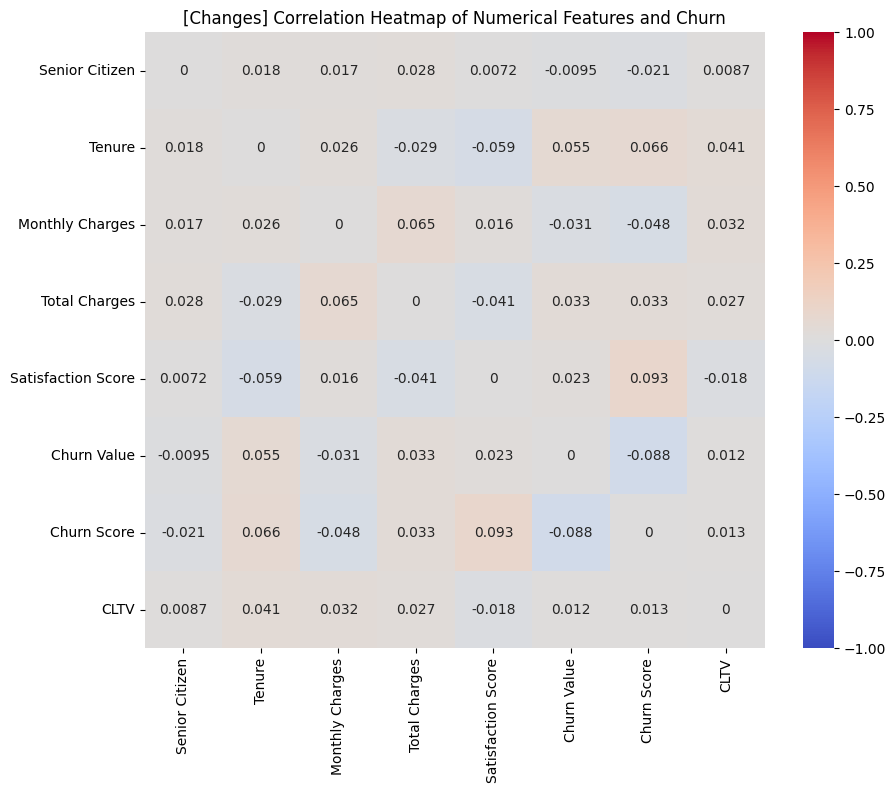

In [19]:
balanced_dataframe = pd.concat([balanced_satisfaction_not_churn, satisfaction_churn_dataframe])

# new balance of churned
churn_value_counts_2 = balanced_dataframe["Churn Value"].value_counts()
fig6, ax6 = plt.subplots(figsize=(3, 5), layout='constrained')
ax6.set_title('Number of not churned (0) and churned (1)')
categories = churn_value_counts_2.index
ax6.bar(categories, churn_value_counts_2.values)
plt.show()
print(churn_value_counts_2)
print("in percents:")
print(balanced_dataframe["Churn Value"].value_counts(normalize=True))
print("=================")

# new heatmap
numerical_dataframe = balanced_dataframe[['Senior Citizen', 'Tenure', 'Monthly Charges', 'Total Charges', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV']]
correlation_matrix_2 = numerical_dataframe.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='Greens', center=0, vmin=-1, vmax=1)
plt.title('[NEW] Correlation Heatmap of Numerical Features and Churn')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix - correlation_matrix_2, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('[Changes] Correlation Heatmap of Numerical Features and Churn')
plt.show()

# =======================
# Part 3: Pre-processing
# =======================

1. Handle missing data
2. Encoding Categorical Variables
3. Normalize the whole
4. Split data (train/test)

### 1. Handle missing data
We don't have missing data, as they were in 2 columns that we removed.

### 2. Encoding Categorical Variables
Replace strings by numerical data so the model can use them.

In [20]:
# With one-hot encoder
one_hot_dataframe = balanced_dataframe.copy()
print(balanced_dataframe.dtypes)
print(one_hot_dataframe.head(10))

contract_encoded = pd.get_dummies(one_hot_dataframe[['Contract']], dtype=float)
print(contract_encoded.head())

payment_encoded = pd.get_dummies(one_hot_dataframe[['Payment Method']], dtype=float)
print(payment_encoded.head())

one_hot_dataframe = pd.concat([one_hot_dataframe, contract_encoded, payment_encoded], axis=1)
one_hot_dataframe.drop(
    columns=[
            "Contract",
            "Payment Method"
        ],
        inplace=True
    )

one_hot_dataframe.head(10)

Senior Citizen          int64
Tenure                  int64
Contract               object
Payment Method         object
Monthly Charges       float64
Total Charges         float64
Satisfaction Score      int64
Churn Value             int64
Churn Score             int64
CLTV                    int64
dtype: object
      Senior Citizen  Tenure        Contract             Payment Method  \
5413               0      15  Month-to-month    Credit card (automatic)   
1093               0      71        Two year           Electronic check   
3866               0      19        Two year               Mailed check   
2539               0      65        Two year    Credit card (automatic)   
5402               0       9        Two year               Mailed check   
282                0       1  Month-to-month               Mailed check   
403                0      68        One year  Bank transfer (automatic)   
4715               0      64        Two year    Credit card (automatic)   
4160       

,Senior Citizen,Tenure,Monthly Charges,Total Charges,Satisfaction Score,Churn Value,Churn Score,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
5413,0,15,94.00,1505.45,3,0,77,4521,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1093,0,71,100.45,7159.70,3,0,34,6171,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3866,0,19,25.60,485.90,3,0,44,5038,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2539,0,65,26.00,1654.85,3,0,72,5352,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5402,0,9,20.35,191.10,3,0,70,5352,0.0,0.0,1.0,0.0,0.0,0.0,1.0
282,0,1,25.40,25.40,3,0,38,4556,1.0,0.0,0.0,0.0,0.0,0.0,1.0
403,0,68,55.90,3848.80,3,0,77,5160,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4715,0,64,86.40,5442.05,3,0,33,6474,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4160,0,26,75.00,1908.35,3,0,79,4705,0.0,1.0,0.0,1.0,0.0,0.0,0.0
885,0,1,20.05,20.05,3,0,52,5368,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 3. Data Normalization
Convert the data into a reduced scale for a better data interpretability for the model

In [21]:
from sklearn.preprocessing import StandardScaler

# Z-score
z_dataframe = one_hot_dataframe.copy()
scaler = StandardScaler()
z_scaled = scaler.fit_transform(z_dataframe)
z_dataframe = pd.DataFrame(z_scaled, index=z_dataframe.index, columns=z_dataframe.columns)
z_dataframe.head()

,Senior Citizen,Tenure,Monthly Charges,Total Charges,Satisfaction Score,Churn Value,Churn Score,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
5413,-0.486754,-0.532174,0.900554,-0.243358,0.205147,-1.0,0.526347,0.170990,0.719487,-0.445921,-0.460929,-0.493051,2.092467,-0.834732,-0.512261
1093,-0.486754,1.811044,1.123475,2.347810,0.205147,-1.0,-1.476870,1.547625,-1.389879,-0.445921,2.169532,-0.493051,-0.477905,1.197990,-0.512261
3866,-0.486754,-0.364801,-1.463438,-0.710586,0.205147,-1.0,-1.011006,0.602335,-1.389879,-0.445921,2.169532,-0.493051,-0.477905,-0.834732,1.952130
2539,-0.486754,1.559985,-1.449614,-0.174893,0.205147,-1.0,0.293415,0.864313,-1.389879,-0.445921,2.169532,-0.493051,2.092467,-0.834732,-0.512261
5402,-0.486754,-0.783233,-1.644885,-0.845684,0.205147,-1.0,0.200242,0.864313,-1.389879,-0.445921,2.169532,-0.493051,-0.477905,-0.834732,1.952130


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Min-max scaler
min_max_dataframe = one_hot_dataframe.copy()
scaler = MinMaxScaler()
min_max_scaled = scaler.fit_transform(min_max_dataframe)
min_max_dataframe = pd.DataFrame(min_max_scaled, index=min_max_dataframe.index, columns=min_max_dataframe.columns)
min_max_dataframe.head()

,Senior Citizen,Tenure,Monthly Charges,Total Charges,Satisfaction Score,Churn Value,Churn Score,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
5413,0.0,0.208333,0.753746,0.173343,0.5,0.0,0.786517,0.560053,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1093,0.0,0.986111,0.818182,0.824394,0.5,0.0,0.303371,0.927046,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3866,0.0,0.263889,0.070430,0.055948,0.5,0.0,0.415730,0.675044,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2539,0.0,0.902778,0.074426,0.190546,0.5,0.0,0.730337,0.744884,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5402,0.0,0.125000,0.017982,0.022004,0.5,0.0,0.707865,0.744884,0.0,0.0,1.0,0.0,0.0,0.0,1.0


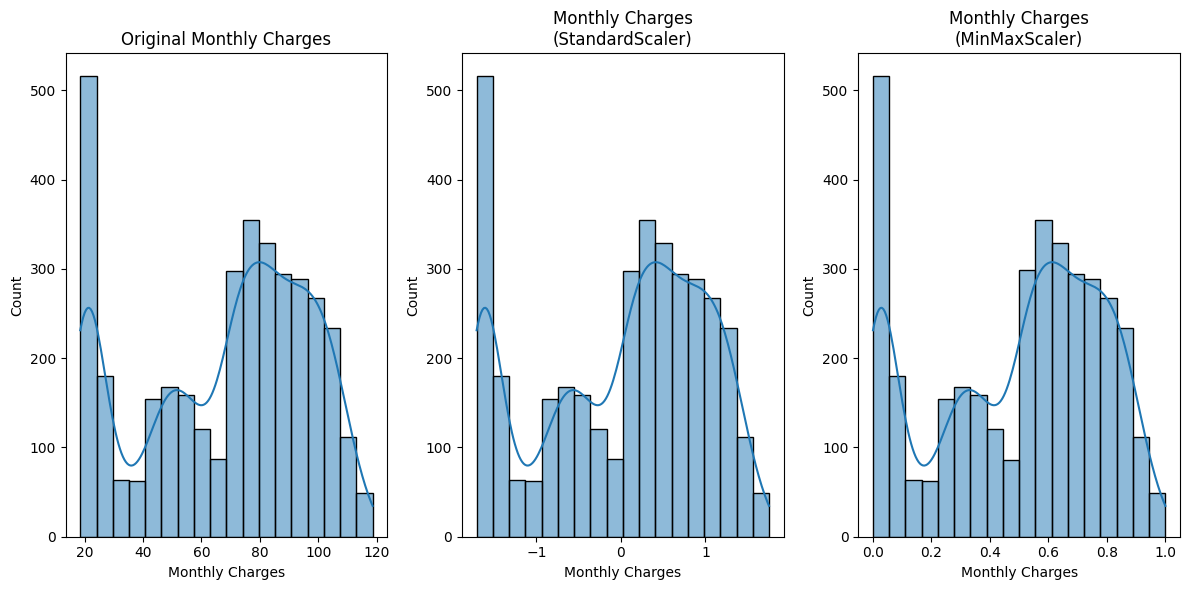

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(one_hot_dataframe['Monthly Charges'], kde=True)
plt.title('Original Monthly Charges')

plt.subplot(1, 3, 2)
sns.histplot(z_dataframe['Monthly Charges'], kde=True)
plt.title('Monthly Charges\n(StandardScaler)')

plt.subplot(1, 3, 3)
sns.histplot(min_max_dataframe['Monthly Charges'], kde=True)
plt.title('Monthly Charges\n(MinMaxScaler)')

plt.tight_layout()

### 4. Split data for training and test

In [24]:
from sklearn.model_selection import train_test_split

y = z_dataframe['Churn Value']
X = z_dataframe.drop(['Churn Value'], axis=1)

min_max_y = min_max_dataframe['Churn Value']
min_max_X = min_max_dataframe.drop(['Churn Value'], axis=1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

min_max_X_train_full, min_max_X_valid_full, min_max_y_train, min_max_y_valid = train_test_split(min_max_X, min_max_y, train_size=0.8, test_size=0.2, random_state=42)

# =======================
# Part 4: Use model and train it
# =======================

Chose many binary classification models and train them on our 2 dataframes.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

regression = LogisticRegression(penalty='elasticnet', solver="saga", l1_ratio=0.5)
knn = KNeighborsClassifier(n_neighbors=61)
xg_boost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
# xgb.train(evals=evals, early_stopping_rounds=10) #bst.best_score, bst.best_iteration

regression.fit(X_train_full, y_train)
regression_y_pred_train = regression.predict(X_train_full)
regression_y_pred_valid = regression.predict(X_valid_full)

print('Penalized LogisticRegression Accuracy on training set : '+ str(accuracy_score(regression_y_pred_train, y_train)))
print('Penalized LogisticRegression Accuracy on test set : '+ str(accuracy_score(regression_y_pred_valid, y_valid)))

Penalized LogisticRegression Accuracy on training set : 0.9625418060200669
Penalized LogisticRegression Accuracy on test set : 0.9572192513368984


In [26]:
regression_raw = LogisticRegression(penalty=None)

regression_raw.fit(X_train_full, y_train)
regression_raw_y_pred_train = regression_raw.predict(X_train_full)
regression_raw_y_pred_valid = regression_raw.predict(X_valid_full)

print('Raw LogisticRegression Accuracy on training set : '+ str(accuracy_score(regression_raw_y_pred_train, y_train)))
print('Raw LogisticRegression Accuracy on test set : '+ str(accuracy_score(regression_raw_y_pred_valid, y_valid)))

Raw LogisticRegression Accuracy on training set : 0.9625418060200669
Raw LogisticRegression Accuracy on test set : 0.9545454545454546


In [27]:
# KNN

knn.fit(X_train_full, y_train)
knn_y_pred_train = knn.predict(X_train_full)
knn_y_pred_valid = knn.predict(X_valid_full)

print('KNN Accuracy on training set : '+ str(accuracy_score(knn_y_pred_train, y_train)))
print('KNN Accuracy on test set : '+ str(accuracy_score(knn_y_pred_valid, y_valid)))

KNN Accuracy on training set : 0.9224080267558529
KNN Accuracy on test set : 0.893048128342246


In [28]:
# XGBoost on min-max, missing parameters?

xg_boost.fit(min_max_X_train_full, min_max_y_train)
xg_boost_y_pred_train = xg_boost.predict(min_max_X_train_full)
xg_boost_y_pred_valid = xg_boost.predict(min_max_X_valid_full)

print('XGBoost Accuracy on training set : '+ str(accuracy_score(xg_boost_y_pred_train, y_train)))
print('XGBoost Accuracy on test set : '+ str(accuracy_score(xg_boost_y_pred_valid, y_valid)))

XGBoost Accuracy on training set : 0.5016722408026756
XGBoost Accuracy on test set : 0.4732620320855615


Thoughts: Penalized Logistic Regression is faster and a little better than the others but I can still try things like
- KNN with different K values
- XGboost with training or better params, as it doesn't seems to work well
- All of them with different data normalization
- All of them with less data, because we suspect some columns to help the overfitting
- Try to have less accuracy on training than on testing

# =======================
# Part 5: Evaluation of the best model
# =======================

How our best model did well and did not?

F1 Score for Penalized LogisticRegression: 0.9574468085106383 

Confusion Matrix:
[[356  23]
 [  9 360]]


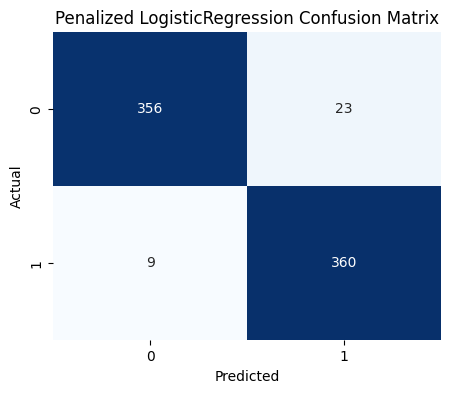


Classification Report:

              precision    recall  f1-score   support

        -1.0       0.98      0.94      0.96       379
         1.0       0.94      0.98      0.96       369

    accuracy                           0.96       748
   macro avg       0.96      0.96      0.96       748
weighted avg       0.96      0.96      0.96       748



In [29]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
f1 = f1_score(y_valid, regression_y_pred_valid)
print(f'F1 Score for Penalized LogisticRegression: {f1} \n')


cm = confusion_matrix(y_valid, regression_y_pred_valid)
print("Confusion Matrix:")
print(cm)

# رسم Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Penalized LogisticRegression Confusion Matrix')
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_valid, regression_y_pred_valid))

# =======================
# Part 6: Explore different parameters
# =======================

Thoughts: Penalized Logistic Regression is faster and a little better than the others but I can still try things like
- KNN with different K values
- XGboost with training or better params, as it doesn't seems to work well
- All of them with different data normalization
- All of them with less data, because we suspect some columns to help the overfitting
- Try to have less accuracy on training than on testing

### 6a) Remove the suspicious columns


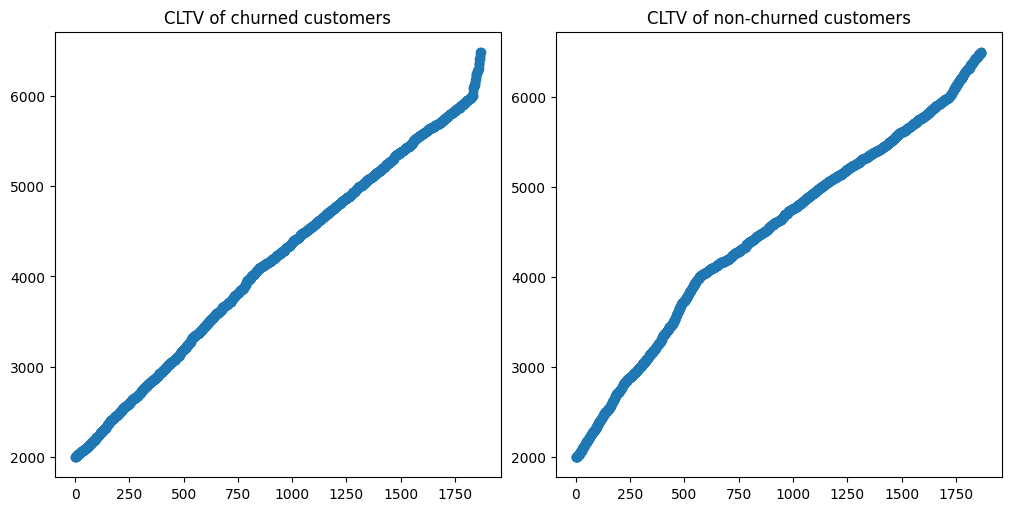

In [30]:
cltv_churn = one_hot_dataframe[one_hot_dataframe['Churn Value'] == 1]
cltv_not_churn = one_hot_dataframe[one_hot_dataframe['Churn Value'] == 0]
cltv_churn = cltv_churn['CLTV'].sort_values(ignore_index=True)
cltv_not_churn = cltv_not_churn['CLTV'].sort_values(ignore_index=True)

fig_cltv, ax_cltv = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
ax_cltv[0].set_title('CLTV of churned customers')
cltv_churned_x = cltv_churn.index
cltv_churned_y = cltv_churn.values
ax_cltv[0].plot(cltv_churned_x, cltv_churned_y, 'o-')
ax_cltv[1].set_title('CLTV of non-churned customers')
cltv_not_churned_x = cltv_not_churn.index
cltv_not_churned_y = cltv_not_churn.values
ax_cltv[1].plot(cltv_not_churned_x, cltv_not_churned_y, 'o-')
plt.show()

In [31]:
print(one_hot_dataframe.head())
short_dataframe = one_hot_dataframe.copy()

short_dataframe.drop(
    columns=[
            "Satisfaction Score",
            "Churn Score"
        ],
        inplace=True
    )

y = short_dataframe['Churn Value']
X = short_dataframe.drop(['Churn Value'], axis=1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y)

y_train

      Senior Citizen  Tenure  Monthly Charges  Total Charges  \
5413               0      15            94.00        1505.45   
1093               0      71           100.45        7159.70   
3866               0      19            25.60         485.90   
2539               0      65            26.00        1654.85   
5402               0       9            20.35         191.10   

      Satisfaction Score  Churn Value  Churn Score  CLTV  \
5413                   3            0           77  4521   
1093                   3            0           34  6171   
3866                   3            0           44  5038   
2539                   3            0           72  5352   
5402                   3            0           70  5352   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
5413                      1.0                0.0                0.0   
1093                      0.0                0.0                1.0   
3866                      0.0            

4628    0
1225    1
3185    1
2727    1
3079    1
       ..
5618    0
4624    1
4303    0
4974    1
595     1
Name: Churn Value, Length: 2990, dtype: int64

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

stand_scaler = Pipeline(steps=[
    ('scaler', StandardScaler())
])

stand_preprocess = ColumnTransformer(
    transformers=[
        ('num', stand_scaler, X.columns)
    ],
    remainder='passthrough')

regression = LogisticRegression()

parameters = [{'solver': ['newton-cg', 'liblinear', 'sag', 'saga']},
              {'penalty':[None, 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(estimator = regression,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(stand_preprocess.fit_transform(X_train_full), y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)

print(f"Best validation scrore: {grid_search.best_score_:%}")
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best hyperparameters found:
{'C': 0.1}
Best validation scrore: 75.250836%


e:\Documents\Alyra\projet_neo\Sentinel-ML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Documents\Alyra\projet_neo\Sentinel-ML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Documents\Alyra\projet_neo\Sentinel-ML\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Documents\Alyra\projet_neo\Sentinel-ML\.

In [33]:
min_max_scaler = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

min_max_preprocess = ColumnTransformer(
    transformers=[
        ('num', min_max_scaler, X.columns)
    ],
    remainder='passthrough')

grid_search_2 = GridSearchCV(estimator = regression,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search_2.fit(min_max_preprocess.fit_transform(X_train_full), y_train)

print("Best hyperparameters found:")
print(grid_search_2.best_params_)

print(f"Best validation scrore: {grid_search_2.best_score_:%}")
min_max_reg_model = grid_search_2.best_estimator_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best hyperparameters found:
{'solver': 'newton-cg'}
Best validation scrore: 75.183946%


e:\Documents\Alyra\projet_neo\Sentinel-ML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Documents\Alyra\projet_neo\Sentinel-ML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Documents\Alyra\projet_neo\Sentinel-ML\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Documents\Alyra\projet_neo\Sentinel-ML\.

In [34]:
knn = KNeighborsClassifier()

parameters = {'n_neighbors':list(range(1, 62)),
              'weights':['uniform', 'distance']}

grid_search_3 = GridSearchCV(estimator = knn,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search_3.fit(min_max_preprocess.fit_transform(X_train_full), y_train)

print("Best hyperparameters found:")
print(grid_search_3.best_params_)

print(f"Best validation scrore: {grid_search_3.best_score_:%}")
min_max_knn_model = grid_search_3.best_estimator_

Fitting 5 folds for each of 122 candidates, totalling 610 fits
Best hyperparameters found:
{'n_neighbors': 12, 'weights': 'uniform'}
Best validation scrore: 74.080268%


In [35]:
grid_search_4 = GridSearchCV(estimator = knn,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search_4.fit(stand_preprocess.fit_transform(X_train_full), y_train)

print("Best hyperparameters found:")
print(grid_search_4.best_params_)

print(f"Best validation scrore: {grid_search_4.best_score_:%}")
stand_knn_model = grid_search_4.best_estimator_

Fitting 5 folds for each of 122 candidates, totalling 610 fits
Best hyperparameters found:
{'n_neighbors': 12, 'weights': 'uniform'}
Best validation scrore: 74.080268%


In [36]:
xgboost = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent=True, nthread=1, verbosity=0)

parameters = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

grid_search_5 = GridSearchCV(estimator = xgboost,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

# Tested on standard scaler, a little less performant.
grid_search_5.fit(min_max_preprocess.fit_transform(X_train_full), y_train)

print("Best hyperparameters found:")
print(grid_search_5.best_params_)

print(f"Best validation scrore: {grid_search_5.best_score_:%}")
xgboost_model = grid_search_5.best_estimator_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters found:
{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}
Best validation scrore: 76.421405%


In [37]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', stand_preprocess),
    ('classifier', xgboost_model)
])

model_pipeline.fit(X_train_full, y_train)
xgboost_y_pred_train = model_pipeline.predict(X_train_full)
xgboost_y_pred_valid = model_pipeline.predict(X_valid_full)

print('XGBoost Accuracy on training set : '+ str(accuracy_score(xgboost_y_pred_train, y_train)))
print('XGBoost Accuracy on test set : '+ str(accuracy_score(xgboost_y_pred_valid, y_valid)))


XGBoost Accuracy on training set : 0.7765886287625418
XGBoost Accuracy on test set : 0.7620320855614974


F1 Score for XGBoost with less columns: 0.7645502645502645 

Confusion Matrix:
[[281  93]
 [ 85 289]]


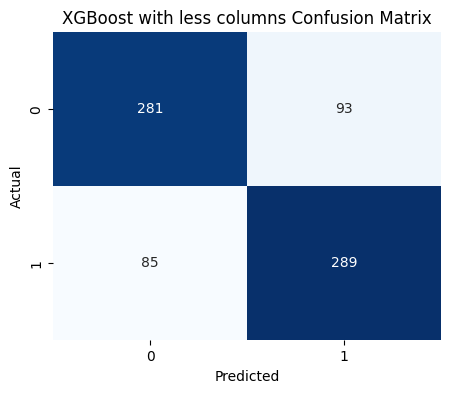


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       374
           1       0.76      0.77      0.76       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



In [38]:
f1_2 = f1_score(y_valid, xgboost_y_pred_valid)
print(f'F1 Score for XGBoost with less columns: {f1_2} \n')


cm_2 = confusion_matrix(y_valid, xgboost_y_pred_valid)
print("Confusion Matrix:")
print(cm_2)

# رسم Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost with less columns Confusion Matrix')
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_valid, xgboost_y_pred_valid))

Does our highly tested model work better on the previous dataset (with Satisfaction Score + Churn Score)?

In [39]:
min_max_y = min_max_dataframe['Churn Value']
min_max_X = min_max_dataframe.drop(['Churn Value'], axis=1)

min_max_X_train_full, min_max_X_valid_full, min_max_y_train, min_max_y_valid = train_test_split(min_max_X, min_max_y, train_size=0.8, test_size=0.2, random_state=42, stratify=min_max_y)

model_pipeline.fit(min_max_X_train_full, min_max_y_train)
xgboost_y_pred_train_2 = model_pipeline.predict(min_max_X_train_full)
xgboost_y_pred_valid_2 = model_pipeline.predict(min_max_X_valid_full)

print('XGBoost Accuracy on training set : '+ str(accuracy_score(xgboost_y_pred_train_2, min_max_y_train)))
print('XGBoost Accuracy on test set : '+ str(accuracy_score(xgboost_y_pred_valid_2, min_max_y_valid)))

XGBoost Accuracy on training set : 0.9688963210702342
XGBoost Accuracy on test set : 0.9786096256684492


F1 Score for XGBoost with all columns: 0.9784366576819407 

Confusion Matrix:
[[369   5]
 [ 11 363]]


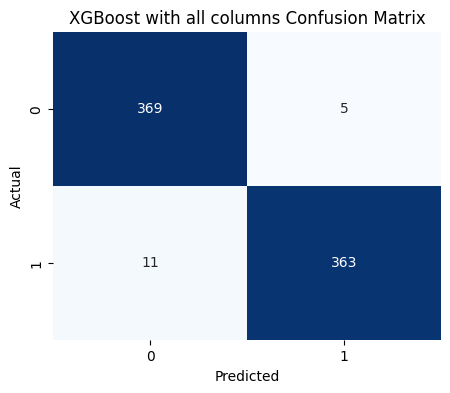


Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       374
         1.0       0.99      0.97      0.98       374

    accuracy                           0.98       748
   macro avg       0.98      0.98      0.98       748
weighted avg       0.98      0.98      0.98       748



In [40]:
f1_3 = f1_score(min_max_y_valid, xgboost_y_pred_valid_2)
print(f'F1 Score for XGBoost with all columns: {f1_3} \n')


cm_3 = confusion_matrix(min_max_y_valid, xgboost_y_pred_valid_2)
print("Confusion Matrix:")
print(cm_3)

# رسم Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost with all columns Confusion Matrix')
plt.show()


print("\nClassification Report:\n")
print(classification_report(min_max_y_valid, xgboost_y_pred_valid_2))

## Conclusion

- `Logistic Regression` is **very fast** and perform well to know if a customer is churned or not, based on the IBM Telco Dataset.
- `XGBoost` perform a little bit better but takes more time to **find the correct hyperparameters** that suits our case. The training time is still quite fast.

- The `Satisfaction Score` was not linked to the `Churn Value` at first sight by the heatmap, but with **a better look** we saw that it is 100% related for 2/3 of the data.
- Stratify is helping to have a 50/50 splitted test dataset.